In [264]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf

In [265]:
#Loading the data
df=pd.read_csv("train_csv.csv")

In [266]:
df["time"]=pd.to_datetime(df["time"])

In [267]:
df.set_index("time",inplace=True)

In [268]:
df.head()

,id,feature
time,,
2019-03-19 00:00:00,0,237.97
2019-03-19 00:00:10,1,57.93
2019-03-19 00:00:20,2,90.53
2019-03-19 00:00:30,3,260.75
2019-03-19 00:00:40,4,49.70


In [269]:
df=df.drop(['id'],axis=1)
df.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


In [270]:
df.index.max()

Timestamp('2019-03-19 00:13:10')

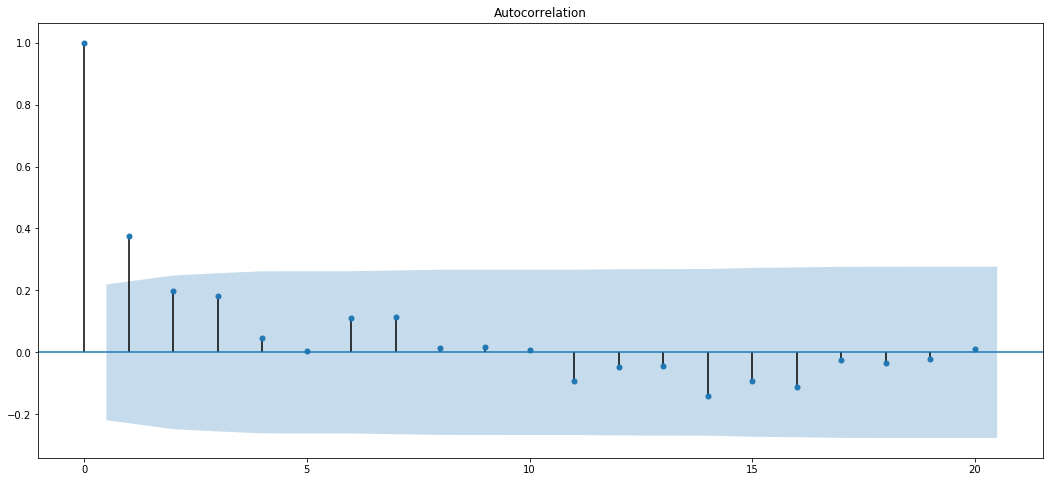

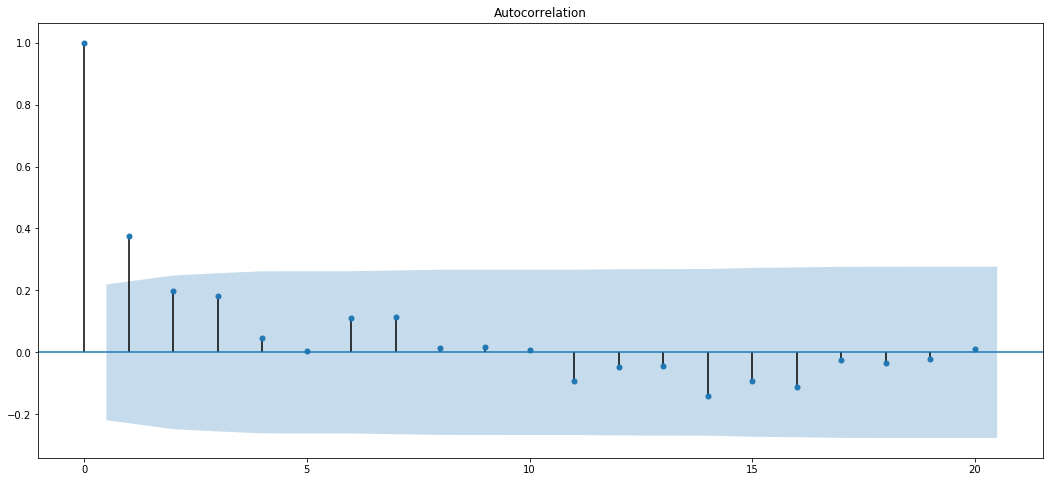

In [271]:
plot_acf(df)

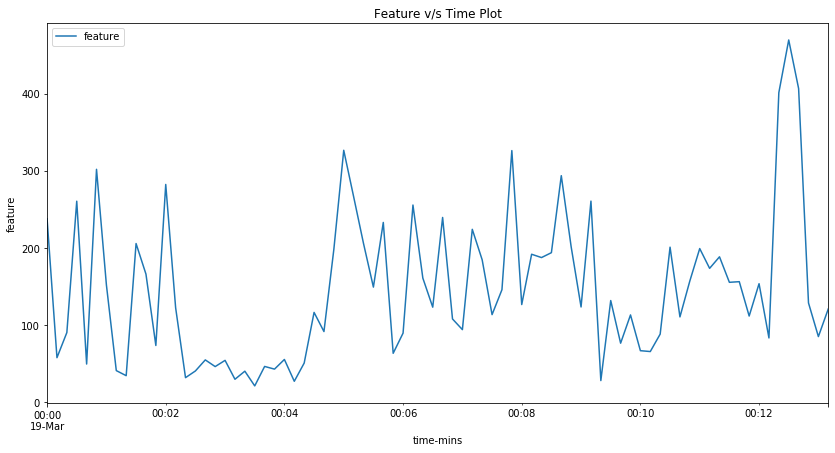

In [272]:
#visualisation
df.plot(figsize=(14,7))
plt.title('Feature v/s Time Plot')
plt.xlabel("time-mins")
plt.ylabel("feature")
plt.show()

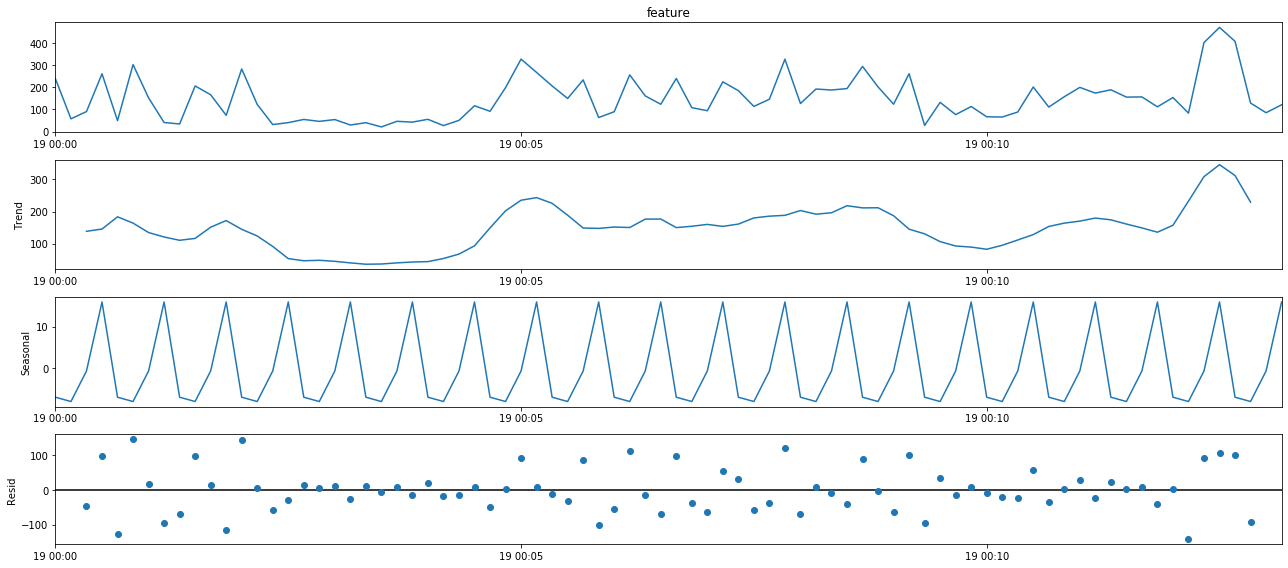

In [273]:
#Visualisation for further understanding
decompPred = sm.tsa.seasonal_decompose(df.feature, model="additive", period=4)
decompPred.plot()
plt.show()

There is a slight upward trend in the graph 

In [274]:
#Converting series to stationary
df_diff=df.diff(periods=1)
df_diff=df_diff[1:]
df_diff.head()

,feature
time,
2019-03-19 00:00:10,-180.04
2019-03-19 00:00:20,32.60
2019-03-19 00:00:30,170.22
2019-03-19 00:00:40,-211.05
2019-03-19 00:00:50,252.38


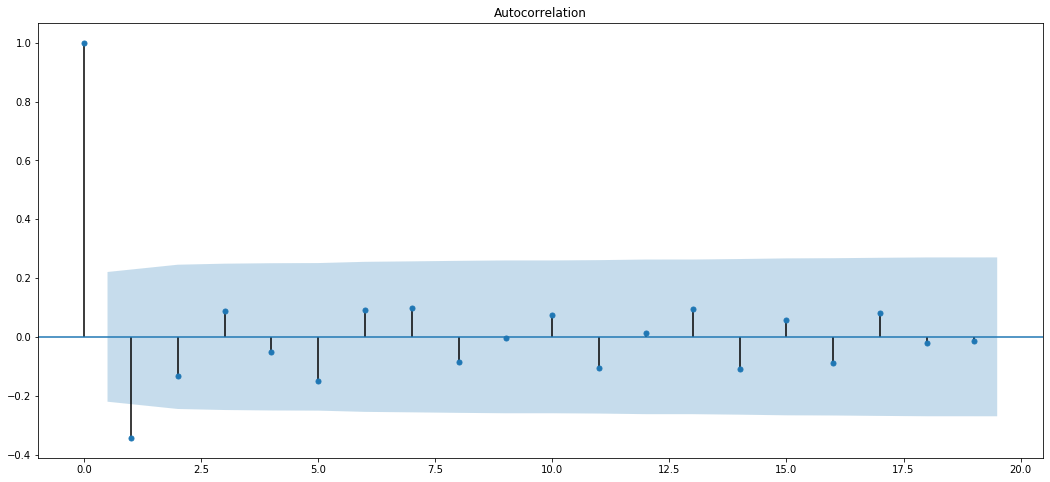

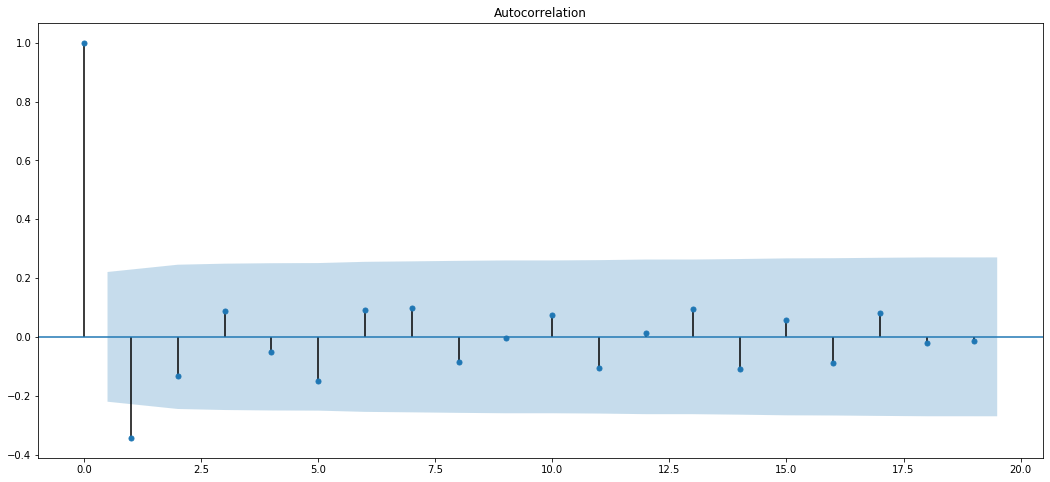

In [275]:
plot_acf(df_diff)

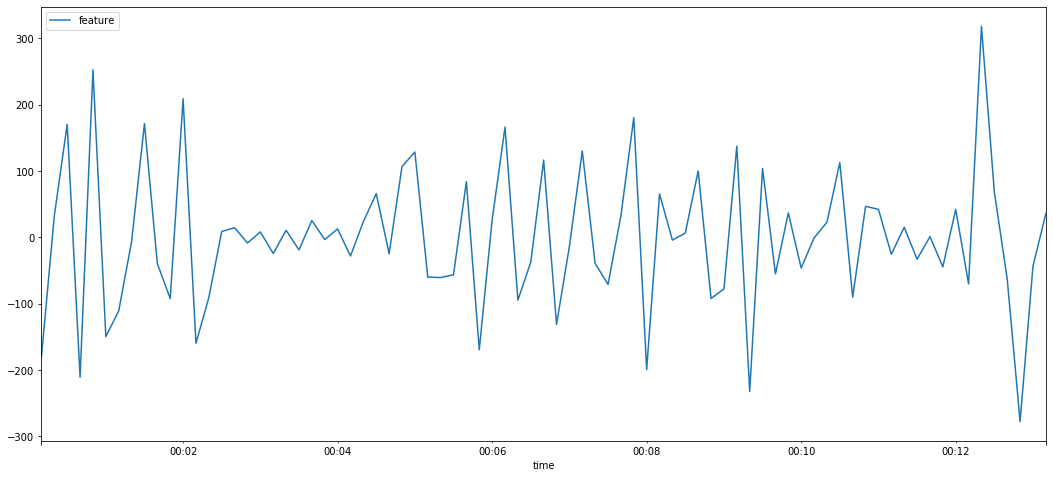

In [276]:
df_diff.plot()

In [277]:
#Training and testing the data
X=df.iloc[0:]
train=X[0:55]
test=X[56:]
pred_feature=[]

In [278]:
#Fitting the ARIMA model
model_arima=ARIMA(train,order=(2,1,0))
model_arima_fit=model_arima.fit()

In [279]:
print(model_arima_fit.aic)

638.7961139702494


In [280]:
pred_feature=model_arima_fit.forecast(steps=24)[0]
pred_feature

array([223.43223296, 199.1665927 , 165.87762922, 201.69857637,
       196.72173056, 183.33635083, 196.25751922, 196.18288379,
       191.24324686, 196.11955864, 197.02666943, 195.54043395,
       197.64826918, 198.61458878, 198.49979536, 199.67664312,
       200.55582945, 200.97253804, 201.84465923, 202.65324294,
       203.27156205, 204.04722315, 204.81646062, 205.50976336])

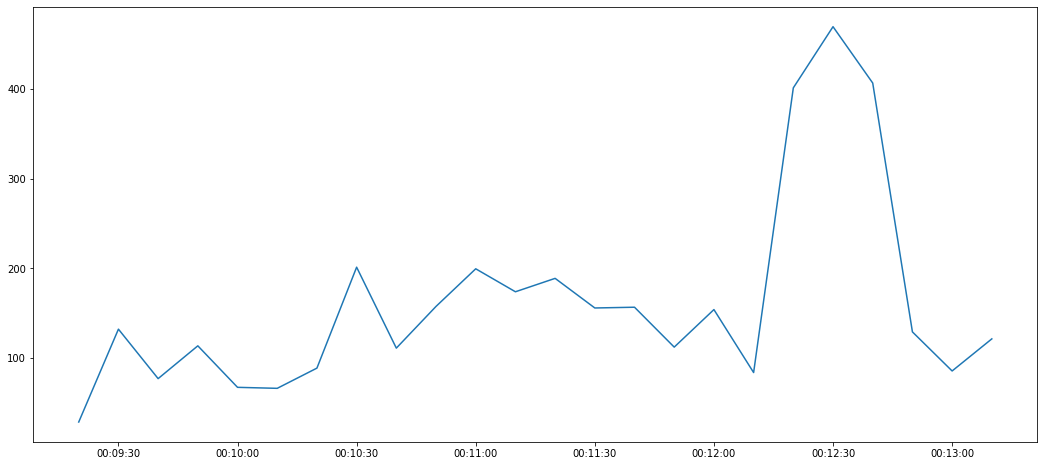

In [281]:
plt.plot(test)

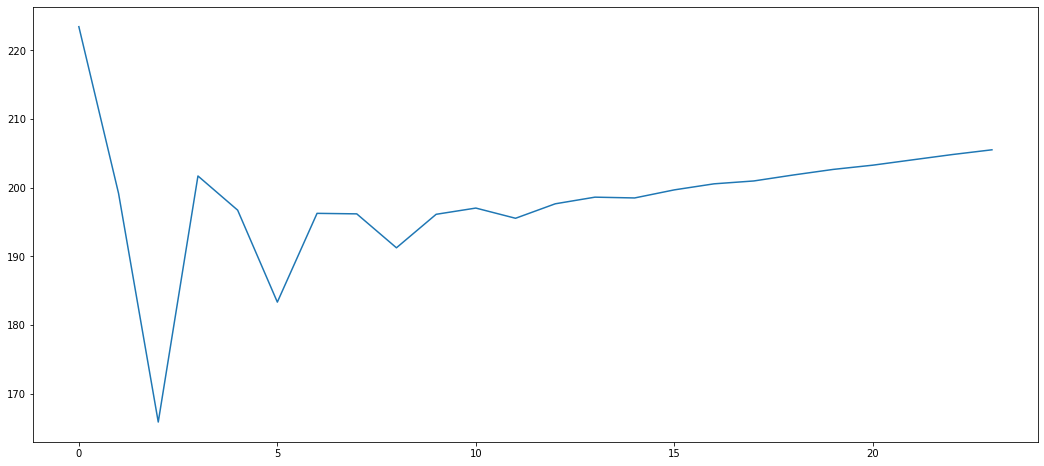

In [282]:
plt.plot(pred_feature)

In [283]:
import itertools

In [284]:
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [285]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima-ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [286]:
mean_squared_error(test,pred_feature)

13170.533658168475

In [287]:
#RMSE Evaluation
rmse = sqrt(mean_squared_error(test, pred_feature))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 114.763


In [288]:
data=pd.read_csv("test_csv.csv")

In [289]:
data.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [290]:
data["time"]=pd.to_datetime(data["time"])

In [291]:
pred_feature=model_arima_fit.forecast(steps=40)[0]

In [292]:
data['pred_feature'] = pred_feature

In [293]:
data.head()

,id,time,pred_feature
0,80,2019-03-19 00:13:20,223.432233
1,81,2019-03-19 00:13:30,199.166593
2,82,2019-03-19 00:13:40,165.877629
3,83,2019-03-19 00:13:50,201.698576
4,84,2019-03-19 00:14:00,196.721731


In [294]:
type(data["time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [297]:
data.to_csv("Final_soln.csv") 